# Modelado:
### Instalación de dependencias

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
import time
import matplotlib.pyplot as plt


### Preprocesamiento de datos

In [5]:
# Cargar los datos
data = pd.read_csv('train.csv')

# Preprocesamiento de datos
# Limpieza de datos (Eliminación de valores nulos)
data = data.dropna()

# Codificación de variables categóricas
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Codificar la variable objetivo 'satisfaction'
data['satisfaction'] = LabelEncoder().fit_transform(data['satisfaction'])

# Normalización de datos numéricos
scaler = StandardScaler()
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Separar características y etiquetas
X = data.drop('satisfaction', axis=1)
y = data['satisfaction']

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Definición y entrenamiento de arquitecturas de red neuronal

Arquitectura A (sin regularización)

In [6]:
# Arquitectura A (sin regularización)
def build_model_A(input_dim):
    model = Sequential([
        Dense(64, input_dim=input_dim, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

model_A = build_model_A(X_train.shape[1])
model_A.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()
history_A = model_A.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
training_time_A = time.time() - start_time

y_pred_A = (model_A.predict(X_test) > 0.5).astype("int32")

accuracy_A = accuracy_score(y_test, y_pred_A)
precision_A = precision_score(y_test, y_pred_A)
recall_A = recall_score(y_test, y_pred_A)
f1_A = f1_score(y_test, y_pred_A)

cm_A = confusion_matrix(y_test, y_pred_A)
tn_A, fp_A, fn_A, tp_A = cm_A.ravel()
specificity_A = tn_A / (tn_A + fp_A)

print(f'Arquitectura A - Precisión: {accuracy_A:.4f}, Recall: {recall_A:.4f}, Especificidad: {specificity_A:.4f}, F1-Score: {f1_A:.4f}')


Epoch 1/50
2072/2072 [==============================] - 10s 4ms/step - loss: 0.3474 - accuracy: 0.8588 - val_loss: 0.2075 - val_accuracy: 0.9192
Epoch 2/50
2072/2072 [==============================] - 7s 3ms/step - loss: 0.2293 - accuracy: 0.9102 - val_loss: 0.1685 - val_accuracy: 0.9312
Epoch 3/50
2072/2072 [==============================] - 8s 4ms/step - loss: 0.1965 - accuracy: 0.9222 - val_loss: 0.1465 - val_accuracy: 0.9405
Epoch 4/50
2072/2072 [==============================] - 7s 4ms/step - loss: 0.1816 - accuracy: 0.9275 - val_loss: 0.1352 - val_accuracy: 0.9459
Epoch 5/50
2072/2072 [==============================] - 8s 4ms/step - loss: 0.1686 - accuracy: 0.9325 - val_loss: 0.1244 - val_accuracy: 0.9474
Epoch 6/50
2072/2072 [==============================] - 7s 3ms/step - loss: 0.1586 - accuracy: 0.9358 - val_loss: 0.1188 - val_accuracy: 0.9492
Epoch 7/50
2072/2072 [==============================] - 7s 3ms/step - loss: 0.1532 - accuracy: 0.9393 - val_loss: 0.1201 - val_accuracy

Arquitectura B (con regularización L2)

In [7]:
# Arquitectura B (con regularización L2)
def build_model_B(input_dim):
    model = Sequential([
        Dense(64, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

model_B = build_model_B(X_train.shape[1])
model_B.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()
history_B = model_B.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
training_time_B = time.time() - start_time

y_pred_B = (model_B.predict(X_test) > 0.5).astype("int32")

accuracy_B = accuracy_score(y_test, y_pred_B)
precision_B = precision_score(y_test, y_pred_B)
recall_B = recall_score(y_test, y_pred_B)
f1_B = f1_score(y_test, y_pred_B)

cm_B = confusion_matrix(y_test, y_pred_B)
tn_B, fp_B, fn_B, tp_B = cm_B.ravel()
specificity_B = tn_B / (tn_B + fp_B)

print(f'Arquitectura B - Precisión: {accuracy_B:.4f}, Recall: {recall_B:.4f}, Especificidad: {specificity_B:.4f}, F1-Score: {f1_B:.4f}')


Epoch 1/50
2072/2072 [==============================] - 10s 4ms/step - loss: 0.3895 - accuracy: 0.8685 - val_loss: 0.2425 - val_accuracy: 0.9233
Epoch 2/50
2072/2072 [==============================] - 8s 4ms/step - loss: 0.2617 - accuracy: 0.9134 - val_loss: 0.1987 - val_accuracy: 0.9356
Epoch 3/50
2072/2072 [==============================] - 7s 4ms/step - loss: 0.2331 - accuracy: 0.9209 - val_loss: 0.1827 - val_accuracy: 0.9422
Epoch 4/50
2072/2072 [==============================] - 8s 4ms/step - loss: 0.2181 - accuracy: 0.9277 - val_loss: 0.1696 - val_accuracy: 0.9432
Epoch 5/50
2072/2072 [==============================] - 8s 4ms/step - loss: 0.2081 - accuracy: 0.9305 - val_loss: 0.1634 - val_accuracy: 0.9445
Epoch 6/50
2072/2072 [==============================] - 8s 4ms/step - loss: 0.1979 - accuracy: 0.9336 - val_loss: 0.1588 - val_accuracy: 0.9471
Epoch 7/50
2072/2072 [==============================] - 8s 4ms/step - loss: 0.1923 - accuracy: 0.9343 - val_loss: 0.1547 - val_accuracy

Arquitectura C (con regularización L1)

In [8]:
# Arquitectura C (con regularización L1)
from tensorflow.keras.regularizers import l1

def build_model_C(input_dim):
    model = Sequential([
        Dense(64, input_dim=input_dim, activation='relu', kernel_regularizer=l1(0.001)),
        Dropout(0.5),
        Dense(32, activation='relu', kernel_regularizer=l1(0.001)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

model_C = build_model_C(X_train.shape[1])
model_C.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()
history_C = model_C.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
training_time_C = time.time() - start_time

y_pred_C = (model_C.predict(X_test) > 0.5).astype("int32")

accuracy_C = accuracy_score(y_test, y_pred_C)
precision_C = precision_score(y_test, y_pred_C)
recall_C = recall_score(y_test, y_pred_C)
f1_C = f1_score(y_test, y_pred_C)

cm_C = confusion_matrix(y_test, y_pred_C)
tn_C, fp_C, fn_C, tp_C = cm_C.ravel()
specificity_C = tn_C / (tn_C + fp_C)

print(f'Arquitectura C - Precisión: {accuracy_C:.4f}, Recall: {recall_C:.4f}, Especificidad: {specificity_C:.4f}, F1-Score: {f1_C:.4f}')


Epoch 1/50
2072/2072 [==============================] - 10s 4ms/step - loss: 0.5477 - accuracy: 0.8691 - val_loss: 0.3236 - val_accuracy: 0.9216
Epoch 2/50
2072/2072 [==============================] - 7s 4ms/step - loss: 0.3464 - accuracy: 0.9048 - val_loss: 0.2797 - val_accuracy: 0.9278
Epoch 3/50
2072/2072 [==============================] - 8s 4ms/step - loss: 0.3166 - accuracy: 0.9098 - val_loss: 0.2575 - val_accuracy: 0.9322
Epoch 4/50
2072/2072 [==============================] - 7s 4ms/step - loss: 0.2975 - accuracy: 0.9154 - val_loss: 0.2420 - val_accuracy: 0.9390
Epoch 5/50
2072/2072 [==============================] - 7s 3ms/step - loss: 0.2861 - accuracy: 0.9188 - val_loss: 0.2297 - val_accuracy: 0.9417
Epoch 6/50
2072/2072 [==============================] - 7s 3ms/step - loss: 0.2740 - accuracy: 0.9217 - val_loss: 0.2228 - val_accuracy: 0.9412
Epoch 7/50
2072/2072 [==============================] - 306s 148ms/step - loss: 0.2700 - accuracy: 0.9217 - val_loss: 0.2159 - val_accu

Arquitectura D (con regularización ElasticNet)

In [9]:
# Arquitectura D (con regularización ElasticNet)
from tensorflow.keras.regularizers import l1_l2

def build_model_D(input_dim):
    model = Sequential([
        Dense(64, input_dim=input_dim, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
        Dropout(0.5),
        Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

model_D = build_model_D(X_train.shape[1])
model_D.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()
history_D = model_D.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
training_time_D = time.time() - start_time

y_pred_D = (model_D.predict(X_test) > 0.5).astype("int32")

accuracy_D = accuracy_score(y_test, y_pred_D)
precision_D = precision_score(y_test, y_pred_D)
recall_D = recall_score(y_test, y_pred_D)
f1_D = f1_score(y_test, y_pred_D)

cm_D = confusion_matrix(y_test, y_pred_D)
tn_D, fp_D, fn_D, tp_D = cm_D.ravel()
specificity_D = tn_D / (tn_D + fp_D)

print(f'Arquitectura D - Precisión: {accuracy_D:.4f}, Recall: {recall_D:.4f}, Especificidad: {specificity_D:.4f}, F1-Score: {f1_D:.4f}')


Epoch 1/50
2072/2072 [==============================] - 10s 4ms/step - loss: 0.5529 - accuracy: 0.8656 - val_loss: 0.3213 - val_accuracy: 0.9200
Epoch 2/50
2072/2072 [==============================] - 8s 4ms/step - loss: 0.3470 - accuracy: 0.9007 - val_loss: 0.2806 - val_accuracy: 0.9260
Epoch 3/50
2072/2072 [==============================] - 7s 4ms/step - loss: 0.3206 - accuracy: 0.9057 - val_loss: 0.2628 - val_accuracy: 0.9265
Epoch 4/50
2072/2072 [==============================] - 7s 3ms/step - loss: 0.3048 - accuracy: 0.9124 - val_loss: 0.2457 - val_accuracy: 0.9341
Epoch 5/50
2072/2072 [==============================] - 8s 4ms/step - loss: 0.2948 - accuracy: 0.9138 - val_loss: 0.2391 - val_accuracy: 0.9387
Epoch 6/50
2072/2072 [==============================] - 7s 4ms/step - loss: 0.2853 - accuracy: 0.9164 - val_loss: 0.2303 - val_accuracy: 0.9395
Epoch 7/50
2072/2072 [==============================] - 7s 4ms/step - loss: 0.2769 - accuracy: 0.9194 - val_loss: 0.2216 - val_accuracy

Guardar y cargar modelos

In [10]:
# Guardar los modelos en formato nativo de Keras
model_A.save('model_A.keras')
model_B.save('model_B.keras')
model_C.save('model_C.keras')
model_D.save('model_D.keras')

# Cargar un modelo para probar
model_loaded = tf.keras.models.load_model('model_A.keras')

# Probar el modelo cargado
y_pred_loaded = (model_loaded.predict(X_test) > 0.5).astype("int32")

accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
precision_loaded = precision_score(y_test, y_pred_loaded)
recall_loaded = recall_score(y_test, y_pred_loaded)
f1_loaded = f1_score(y_test, y_pred_loaded)

cm_loaded = confusion_matrix(y_test, y_pred_loaded)
tn_loaded, fp_loaded, fn_loaded, tp_loaded = cm_loaded.ravel()
specificity_loaded = tn_loaded / (tn_loaded + fp_loaded)

print(f'Modelo cargado (Arquitectura A) - Precisión: {accuracy_loaded:.4f}, Recall: {recall_loaded:.4f}, Especificidad: {specificity_loaded:.4f}, F1-Score: {f1_loaded:.4f}')


648/648 [==============================] - 1s 2ms/step
Modelo cargado (Arquitectura A) - Precisión: 0.9612, Recall: 0.9340, Especificidad: 0.9823, F1-Score: 0.9547


### Testing


In [11]:
test_data = pd.read_csv('test.csv')

test_data = test_data.dropna()

categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
test_data = pd.get_dummies(test_data, columns=categorical_cols, drop_first=True)

test_data['satisfaction'] = LabelEncoder().fit_transform(test_data['satisfaction'])

scaler = StandardScaler()
numeric_cols = test_data.select_dtypes(include=['float64', 'int64']).columns
test_data[numeric_cols] = scaler.fit_transform(test_data[numeric_cols])

X_test = test_data.drop('satisfaction', axis=1)
y_test = test_data['satisfaction']

def evaluate_model(model, X_test, y_test):
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    
    print(f'Precisión: {accuracy:.4f}, Recall: {recall:.4f}, Especificidad: {specificity:.4f}, F1-Score: {f1:.4f}')
    return accuracy, precision, recall, specificity, f1

print("Evaluación de Arquitectura A:")
accuracy_A, precision_A, recall_A, specificity_A, f1_A = evaluate_model(model_A, X_test, y_test)

print("\nEvaluación de Arquitectura B:")
accuracy_B, precision_B, recall_B, specificity_B, f1_B = evaluate_model(model_B, X_test, y_test)

print("\nEvaluación de Arquitectura C:")
accuracy_C, precision_C, recall_C, specificity_C, f1_C = evaluate_model(model_C, X_test, y_test)

print("\nEvaluación de Arquitectura D:")
accuracy_D, precision_D, recall_D, specificity_D, f1_D = evaluate_model(model_D, X_test, y_test)

evaluation_comparison_test = pd.DataFrame({
    "Nombre de arquitectura": ["A", "B", "C", "D"],
    "Precisión": [accuracy_A, accuracy_B, accuracy_C, accuracy_D],
    "Recall": [recall_A, recall_B, recall_C, recall_D],
    "Especificidad": [specificity_A, specificity_B, specificity_C, specificity_D],
    "F1-Score": [f1_A, f1_B, f1_C, f1_D]
})

evaluation_comparison_test


Evaluación de Arquitectura A:
810/810 [==============================] - 2s 2ms/step
Precisión: 0.9584, Recall: 0.9321, Especificidad: 0.9789, F1-Score: 0.9516

Evaluación de Arquitectura B:
810/810 [==============================] - 2s 2ms/step
Precisión: 0.9539, Recall: 0.9297, Especificidad: 0.9729, F1-Score: 0.9466

Evaluación de Arquitectura C:
810/810 [==============================] - 2s 2ms/step
Precisión: 0.9434, Recall: 0.9194, Especificidad: 0.9621, F1-Score: 0.9344

Evaluación de Arquitectura D:
810/810 [==============================] - 2s 2ms/step
Precisión: 0.9396, Recall: 0.9007, Especificidad: 0.9701, F1-Score: 0.9290


,Nombre de arquitectura,Precisión,Recall,Especificidad,F1-Score
0,A,0.958367,0.932072,0.978937,0.951581
1,B,0.953926,0.929696,0.972880,0.946562
2,C,0.943382,0.919402,0.962142,0.934448
3,D,0.939598,0.900660,0.970058,0.929025


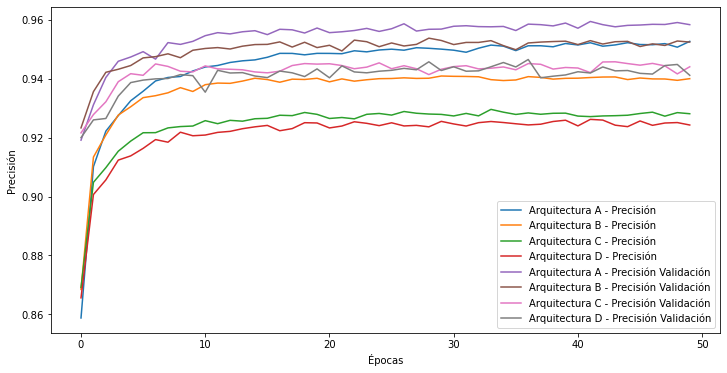

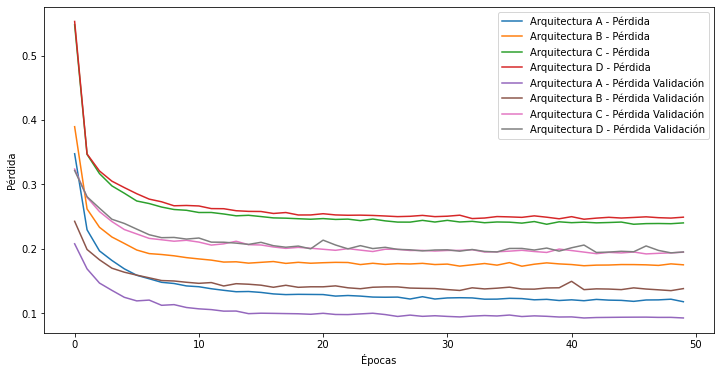

In [16]:
learning_rate_A = model_A.optimizer.learning_rate.numpy()
learning_rate_B = model_B.optimizer.learning_rate.numpy()
learning_rate_C = model_C.optimizer.learning_rate.numpy()
learning_rate_D = model_D.optimizer.learning_rate.numpy()

training_comparison = pd.DataFrame({
    "Nombre de arquitectura": ["A", "B", "C", "D"],
    "Tasa de aprendizaje": [learning_rate_A, learning_rate_B, learning_rate_C, learning_rate_D],
    "Optimizador": ["adam", "adam", "adam", "adam"],
    "Tamaño de lote": [32, 32, 32, 32],
    "Número de épocas": [50, 50, 50, 50],
    "Tiempo aproximado de entrenamiento": [training_time_A, training_time_B, training_time_C, training_time_D],
    "Costo final después del entrenamiento": [history_A.history['loss'][-1], history_B.history['loss'][-1], history_C.history['loss'][-1], history_D.history['loss'][-1]]
})


evaluation_comparison = pd.DataFrame({
    "Nombre de arquitectura": ["A", "B", "C", "D"],
    "Precisión": [accuracy_A, accuracy_B, accuracy_C, accuracy_D],
    "Recall": [recall_A, recall_B, recall_C, recall_D],
    "Especificidad": [specificity_A, specificity_B, specificity_C, specificity_D],
    "F1-Score": [f1_A, f1_B, f1_C, f1_D]
})

plt.figure(figsize=(12, 6))
plt.plot(history_A.history['accuracy'], label='Arquitectura A - Precisión')
plt.plot(history_B.history['accuracy'], label='Arquitectura B - Precisión')
plt.plot(history_C.history['accuracy'], label='Arquitectura C - Precisión')
plt.plot(history_D.history['accuracy'], label='Arquitectura D - Precisión')
plt.plot(history_A.history['val_accuracy'], label='Arquitectura A - Precisión Validación')
plt.plot(history_B.history['val_accuracy'], label='Arquitectura B - Precisión Validación')
plt.plot(history_C.history['val_accuracy'], label='Arquitectura C - Precisión Validación')
plt.plot(history_D.history['val_accuracy'], label='Arquitectura D - Precisión Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history_A.history['loss'], label='Arquitectura A - Pérdida')
plt.plot(history_B.history['loss'], label='Arquitectura B - Pérdida')
plt.plot(history_C.history['loss'], label='Arquitectura C - Pérdida')
plt.plot(history_D.history['loss'], label='Arquitectura D - Pérdida')
plt.plot(history_A.history['val_loss'], label='Arquitectura A - Pérdida Validación')
plt.plot(history_B.history['val_loss'], label='Arquitectura B - Pérdida Validación')
plt.plot(history_C.history['val_loss'], label='Arquitectura C - Pérdida Validación')
plt.plot(history_D.history['val_loss'], label='Arquitectura D - Pérdida Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


In [17]:
training_comparison

,Nombre de arquitectura,Tasa de aprendizaje,Optimizador,Tamaño de lote,Número de épocas,Tiempo aproximado de entrenamiento,Costo final después del entrenamiento
0,A,0.001,adam,32,50,381.733781,0.117527
1,B,0.001,adam,32,50,379.551369,0.174861
2,C,0.001,adam,32,50,672.322708,0.239961
3,D,0.001,adam,32,50,378.543294,0.248855


In [ ]:
evaluation_comparison